In [574]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
</style>
""")

# Evaluating Classifiers

**Overview**
This exercise is about evaluation metrics for binary classification. 
The main focus is to evaluate a classification model, irrespective of which model (linear or non-linear) is being used.

Recall that the confusion matrix for binary classification problems has the following structure:

$$
\begin{array}{cc|c|c|}
  & & \text{Predicted Negative} & \text{Predicted Positive} \\
\hline
\text{Actual Negative} & & TN & FP \\
\hline
\text{Actual Positive} & & FN & TP \\
\end{array}
$$
- **TN** - True Negative
- **FN** - False Negative 
- **FP** - False positive
- **TP** - True Positive


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#import">Task 1: Generating Data</a>
            </li>
            <li>
            <a href="#First">Task 2: Training a random Classifier</a>
            </li>
            <li>
            <a href="#accuracy">Task 3: Model accuracy</a>
            </li>
            <li>
            <a href="#classif_report">Task 4: Evaluation</a>
            </li>
            <li>
            <a href="#svc_model">Task 5: Class Imbalance visualization reflection</a>
            </li>
            <li>
            <a href="#metrics">Task 6: ROC and Precision-Recall curves evaluati…</a>
            </li>
        </ul>
    </div>
</article>

## Generating Data

---
**Task 1 (easy): Generating Data👩‍💻**
1. Run the cell below to generate a dataset comprising of 500 samples, 20 features, and 2 classes. This dataset is partitioned using an 80-20 train-test split.


---

In [575]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, auc, average_precision_score, roc_curve
import classifier_util

import warnings
warnings.filterwarnings("ignore")


X,Y  = datasets.make_classification(n_samples=500, n_features=20, n_classes=2, random_state=1)
print('Dataset Size : ',X.shape,Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y, random_state=1)
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Dataset Size :  (500, 20) (500,)
Train/Test Size :  (400, 20) (100, 20) (400,) (100,)


## Performance Metrics
In the following task you will evaluate the model's performance on the test data using different metrics. 

---
**Task 2 (easy): Training a random Classifier👩‍💻**
1. Run the cell below to train a random Classifier.


---

In [576]:
classifier1 = classifier_util.RandomClassifier(random_state=1, C=0.1)
classifier1.fit(X_train, Y_train)


---
**Task 3 (easy): Model accuracy👩‍💻**
Classification accuracy is given by 
$$ \text{accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$
 
Run the following cell to make predictions using the `RandomClassifier`
 on the test and training sets. Calculate accuracy by comparing predictions to actual labels: 
1. Calculate model accuracy on the training set.
2. Calculate model accuracy on the test set.
3. Run the cell below to construct and plot the confusion matrix of the model predictions on the training set. 
4. Construct and plot the confusion matrix of the model predictions on the test set. 


---

Accuracy for test:  0.93
Accuracy for train:  0.9525


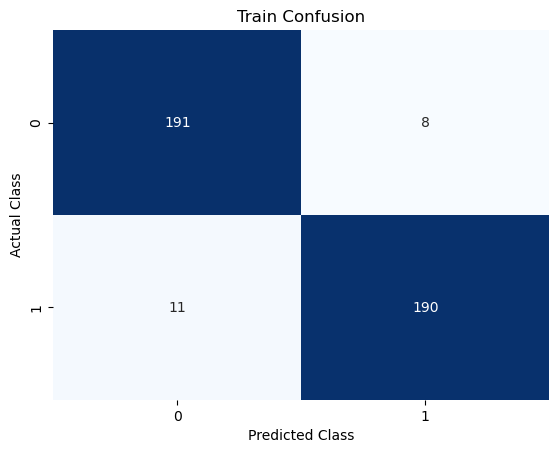

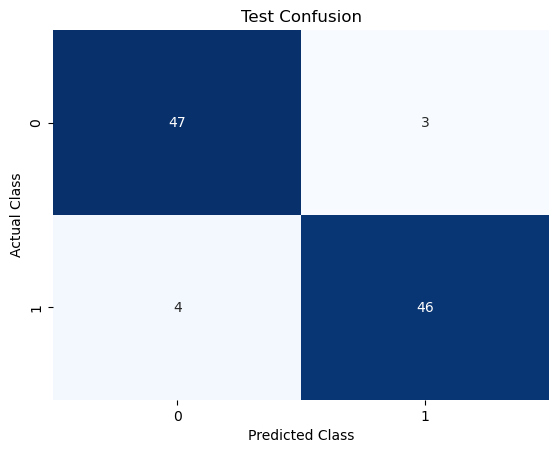

In [577]:
Y_preds = classifier1.predict(X_test)
Y_preds2 = classifier1.predict(X_train)

# Calculate accuracy here ... 
accuracy_test = np.sum(Y_test == Y_preds)/len(Y_preds)
print("Accuracy for test: ", accuracy_test)

accuracy_train = np.sum(Y_train == Y_preds2)/len(Y_preds2)
print("Accuracy for train: ", accuracy_train)

conf_mat_train = confusion_matrix(Y_train, Y_preds2)
sns.heatmap(conf_mat_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Train Confusion')
plt.show()

conf_mat_test = confusion_matrix(Y_test, Y_preds)
sns.heatmap(conf_mat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Test Confusion')
plt.show()

**Performance metrics**

**Recall from the lecture**
Performance metrics such as **precision**, **recall**, **F$_1$-score**, **specificity** and **Matthews Correlation Coefficient (MCC)**  provide different views of the performance of the classifier.
- **Precision** - or positive predictive value, represents how many predictions of the positive class actually belong to that class. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑃}
$$


- **Recall** -  also known as sensitivity, true positive rate, or hit rate assesses whether the classifier correctly identifies positive instances out of the total actual postive instances. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑁} 
$$


- **F$_1$-score** - harmonic mean of precision & recall. 

$$
2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision}+\text{Recall}} 
$$


- **Specificity** - also known as the true negative rate, is the percentage of correctly predicted instances of the negative class. 

$$
\frac{TN}{TN+FP} 
$$


- **Matthews Correlation Coefficient (MCC)** - also known as the phi coefficient, is a correlation-based metric that measures the quality of binary classifications, even with imbalanced classes.

$$ 
MCC=\frac{TP \cdot TN-FP \cdot FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
$$





---
**Task 4 (easy): Performance metrics👩‍💻**
1. Use the confusion matrix of the test data from [Task 3](#accuracy) to find and store the true positive, false positive, true negative and false negative values. 

2. In the cell below calculate the following evaluation metrics for the classification model:
    - Precision
    - Recall
    - F1-score
    - Specificity
    - MCC




---

In [578]:
# write your solution here
TN_test = conf_mat_test[0][0]
FP_test = conf_mat_test[0][1]
FN_test = conf_mat_test[1][0]
TP_test = conf_mat_test[1][1]

TN_train = conf_mat_train[0][0]
FP_train = conf_mat_train[0][1]
FN_train = conf_mat_train[1][0]
TP_train = conf_mat_train[1][1]


precision_test = TP_test/(TP_test+FP_test)
recall_test = TP_test/(TP_test+FN_test)
F_1_test = 2*((precision_test*recall_test)/(precision_test+recall_test))
specificity_test = TN_test/(TN_test+FP_test)
MCC_test = ((TP_test*TN_test)-(FP_test*FN_test))/(np.sqrt((TP_test+FP_test)*(TP_test+FN_test)*(TN_test+FP_test)*(TN_test+FN_test)))

precision_train = TP_train/(TP_train+FP_train)
recall_train = TP_train/TP_train+FN_train
F_1_train = 2*(precision_train*recall_train/precision_train+recall_train)
specificity_train = TN_train/TN_train+FP_train
MCC_train = (TP_train*TN_train-FP_train*FN_train)/(np.sqrt((TP_train+FP_train)*(TP_train+FN_train)*(TN_train+FP_train)*(TN_train+FN_train)))

print("precision test ", precision_test)
print("recall test", recall_test)
print("F1 test ", F_1_test)
print("specificity test ", specificity_test)
print("MCC test ", MCC_test)



precision test  0.9387755102040817
recall test 0.92
F1 test  0.9292929292929293
specificity test  0.94
MCC test  0.8601720516172061



---
**Task 5 (easy): Evaluation💡📽️**
1. Inspect the metrics and reflect on how they individually help in understanding and evaluating the performance of a classification model?
2. How does the MCC help you assess the performance of the models?


---

In [579]:
# Write your reflections here...

# ----1-----
# Precision: or positive predictive value, represents how many predictions of the positive class actually belong to that class.
# Looks at how many true positives there are out of all positives, 
# shows that there is a high rate of true positives out of all the positives. 
# How many dogs are found, true dogs or false dog, i.e muffin. 

# Recall -  also known as sensitivity, true positive rate, or hit rate assesses whether the classifier correctly identifies 
# positive instances out of the total actual postive instances. 
# Checks how many dogs are found out of all dogs that are present. 
# in this example is still very high, therefore out of total number of dogs, most of them are classified as dogs.
# We find 92% of the positives.

# F1-score - harmonic mean of precision & recall. 
# ensures both presicion and recall are high, so since f1 is high both recall and precision are high and are therefore pretty even.
# it is good when they are even.

# Specificity - also known as the true negative rate, is the percentage of correctly predicted instances of the negative class. 
# How many muffins are muffins and how many muffins are classifid as a dog. The reversed of recall. 
# So how many negatives were counted as a positive.
# Still a high value, so correctly idenifies 94% of the negative cases. So it is 2% better at identifying negatives than positives

# Matthews Correlation Coefficient (MCC) - also known as the phi coefficient, is a correlation-based metric that measures 
# the quality of binary classifications, even with imbalanced classes.
# Used to find balance between positives and negatives. If it has only found positives and no negatives then this will be undefined
# Sinse we get 0.86 there is a balance between positives and negatives, and a semi high prediction rate.
# 1 means perfect, 0 means random, -1 is total disagreement. Undefined means that there are no positives or no negatives.
# Makes sure the dataset is balances and there is a balance between positives and negatives




## Imbalanced Classes
The cell below generates a dataset with 1,000 samples across 10 classes. Then an imbalanced dataset is created by combining 9 classes such that all samples in class 0 are marked as positive, while samples in the remaining classes are marked as negative. This results in a 10% positive and 90% negative distribution.


In [580]:
X, Y = datasets.make_classification(n_samples=1000, n_classes=10, n_informative=10)

# Mark the minority class as True
Y = (Y == 0).astype(int)

print('Dataset Size:', X.shape, Y.shape)

# Check the imbalance ratio
imbalance_ratio_actual = np.mean(Y)
print(f'Imbalance Ratio (Positive/Minority Class): {imbalance_ratio_actual:.2f}')

Dataset Size: (1000, 20) (1000,)
Imbalance Ratio (Positive/Minority Class): 0.10



---
**Task 6 (hard): Class Imbalance👩‍💻**
The following task will evaluate `classifier2`
 on the imbalanced dataset.
1. The cell below includes the classifier, variables to store performance metrics, and an incomplete for-loop that performs data splitting for 5-fold cross-validation. Complete the loop so that for each fold:    - Train a `classifier2`
 on the training folds. 
    - Predict labels on the validation folds.
    - Calculate the confusion matrix and the performance metrics on the validation sets (precision, recall, F1-Score, specificity, MCC). Print the average of each metric (use `np.nanmean()`
 as some of these metrics might inlcude NaNs). 




**Info**
In the cell below, the data is randomized before each split. This can lead to slight variations in model performance metrics and graphs, so different results can be expected with each run.


---

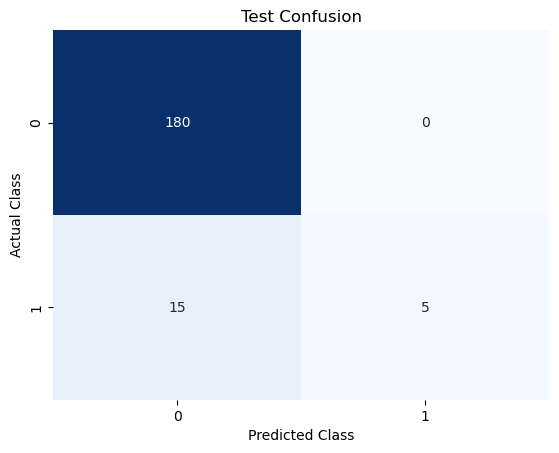

Precision for test:  1.0
Recalls for test:  0.25
f1 score for test:  0.4
specificity for test:  1.0
MCC for test:  0.48038446141526137


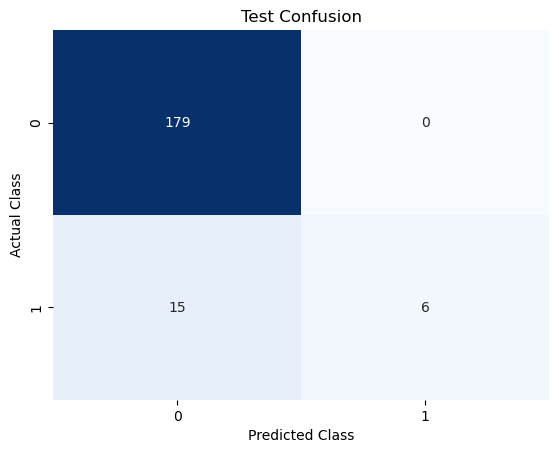

Precision for test:  1.0
Recalls for test:  0.2857142857142857
f1 score for test:  0.4444444444444445
specificity for test:  1.0
MCC for test:  0.5134422800697087


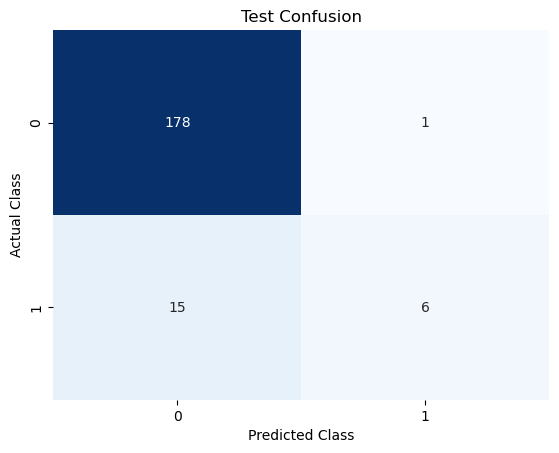

Precision for test:  0.8571428571428571
Recalls for test:  0.2857142857142857
f1 score for test:  0.42857142857142855
specificity for test:  0.994413407821229
MCC for test:  0.46726637927710624


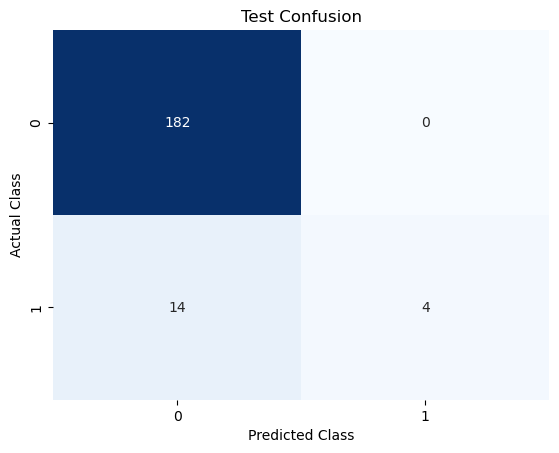

Precision for test:  1.0
Recalls for test:  0.2222222222222222
f1 score for test:  0.3636363636363636
specificity for test:  1.0
MCC for test:  0.45425676257949793


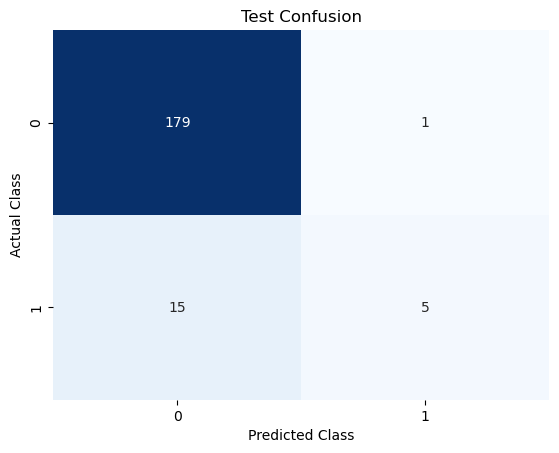

Precision for test:  0.8333333333333334
Recalls for test:  0.25
f1 score for test:  0.3846153846153846
specificity for test:  0.9944444444444445
MCC for test:  0.4298876132910694
-------------------------------------
precisions:  0.9380952380952381
Recalls:  0.2587301587301587
F1 scores:  0.40425352425352423
Specificities:  0.9977715704531347
MCCs:  0.46904749932652867


In [581]:
classifier2 = classifier_util.RandomClassifier2()

# accuracies= []
accuracies, precisions, recalls, f1_scores, specificities, mccs = [], [], [], [], [], []

for train_idx_svc, test_idx_svc in KFold(n_splits=5, shuffle=True).split(X):
    X_train, X_test = X[train_idx_svc], X[test_idx_svc]
    Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]
    
    # write your solution here
    # Train classifier
    classifier2.fit(X_train, Y_train)
    Y_preds_test = classifier2.predict(X_test)

    # Calculate accuracy here ... 
    accuracy_test = np.sum(Y_test == Y_preds_test)/len(Y_preds_test)
    accuracies.append(accuracy_test)

    #Create confusion matrix
    conf_mat_test = confusion_matrix(Y_test, Y_preds_test)
    sns.heatmap(conf_mat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title('Test Confusion')
    plt.show()
    
    TN_test = conf_mat_test[0][0]
    FP_test = conf_mat_test[0][1]
    FN_test = conf_mat_test[1][0]
    TP_test = conf_mat_test[1][1]

    precision_test = TP_test/(TP_test+FP_test)
    recall_test = TP_test/(TP_test+FN_test)
    F_1_test = 2*((precision_test*recall_test)/(precision_test+recall_test))
    specificity_test = TN_test/(TN_test+FP_test)
    MCC_test = ((TP_test*TN_test)-(FP_test*FN_test))/(np.sqrt((TP_test+FP_test)*(TP_test+FN_test)*(TN_test+FP_test)*(TN_test+FN_test)))
    
    precisions.append(precision_test)
    recalls.append(recall_test)
    f1_scores.append(F_1_test)
    specificities.append(specificity_test)
    mccs.append(MCC_test)

    print("Precision for test: ", precision_test)
    print("Recalls for test: ", recall_test)
    print("f1 score for test: ", F_1_test)
    print("specificity for test: ", specificity_test)
    print("MCC for test: ", MCC_test)

print("-------------------------------------")
print("precisions: ", np.nanmean(precisions))
print("Recalls: ", np.nanmean(recalls))
print("F1 scores: ", np.nanmean(f1_scores))
print("Specificities: ", np.nanmean(specificities))
print("MCCs: ", np.nanmean(mccs))








---
**Task 7 (hard): Class Imbalance💡📽️**
The following task will evaluate `classifier2`
 on the imbalanced dataset.
1. Why do some of the metrics return NaNs?
2. Is the model able to reliably identify the minority class? 
3. What are the implications for the model's performance and its practical utility?
4. How does the MCC help you assess the performance of the models, especially regarding their ability to handle class imbalance? 


---

In [582]:
# Write your reflections here...

# -----1-----
# When we divide by 0 we get NaN, so if fx TP and FP are both 0 then precision will be NaN. If TP and FN are 0 then recalls will be NaN.
# Therefore MCC can also return NaN. F1 is NaN when either precision or recall are NaN. 
# MCC is NaN if any horizontal or vertican values is summed to zero then MCC will be NaN. 
# Ergo for any calculation is the nominator is zero, then we get NaN

# -----2-----
# True Positives are very low. We have a lot of False negatives. 
# Recalll is very low because we have very few True positives and also few false positives. Therefore recall is always low.
# The number of false negatives are bigger than True Positives.
# It is bad at identifying true positives. Only 10% are positives.
# It has a lot of negatives and a few positives, therefore it is really good at guessing what is negative, but also guesses a lot of the 
# positives are negatives. We have 10% triangles, 90% circles, and therefore it guesses most things are circles and almosty never 
# guess triangle. 

# -----3-----
# Not very usefull if we want to be precise. 
# For example if we want it to find cancer cells and we have given it 900 pictures of breasts with cancer and 100 pictures 
# without cancer, then the model would almost never guess when given a picture that that breast has cancer, this would be 
# bad in real life.
# Therefore the implecations are that we could have troubles finding positives with this model.

# ----4-----
# MCC is very low is there is a class imbalance, the same with F1.


---
**Task 8 (hard): Class Imbalance visualization👩‍💻**
1. Run the cell below to plot all the metrics in the same plot.


**Info**
In the cell below, the data is randomized before each split. This can lead to slight variations in model performance metrics and graphs, so different results can be expected with each run.


---

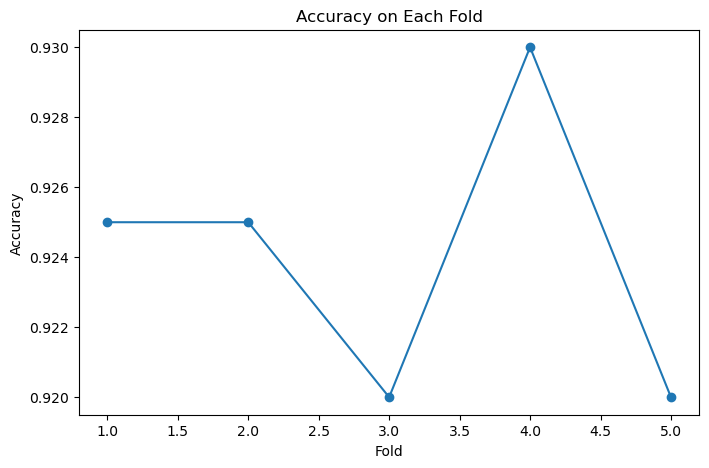

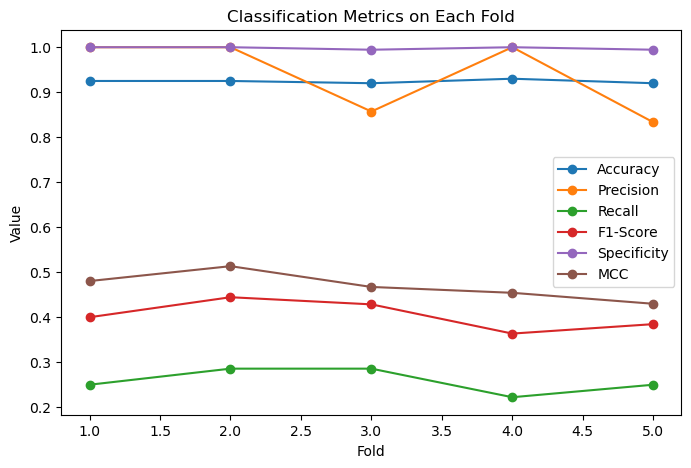

In [583]:
# Step 2
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), accuracies, marker='o')
plt.title('Accuracy on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

# step 5
# Create a list of metric names for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity', 'MCC']

# Create a list of the values for each metric
metric_values = [accuracies, precisions, recalls, f1_scores, specificities, mccs]

# Plot the metrics on the same plot
plt.figure(figsize=(8, 5))
for i, metric_values_list in enumerate(metric_values):
    plt.plot(range(1, 6), metric_values_list, marker='o', label=metrics[i])

plt.title('Classification Metrics on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Value')
plt.legend()
plt.show()


---
**Task 9 (hard): Class Imbalance visualization reflection💡**
1. Are certain metrics consistently lower? What might this indicate about the model’s handling of the imbalanced data?


---

In [584]:
# write your reflections here

# My recall, F1-score and MCC are consistently lower. Recall is because there are so few false and true positives.
# F1 is because precision and recall are not very balanced and recall is a lot lower than precision, therefore
# F1 is lower.
# MCC is also low because the data is not balanced. 
# The model is therefore not very good at handling imbalanced data. We mostly see that from the MCC value being low.
# MCC close to zero means that it is basically random. So it could just have randomly predicted. So low MCC means closer to being
# random than to actually predict

## ROC Curves and Precision-Recall Curves
This task examines the ROC (Receiver Operating Characteristic) curve and the Precision-Recall curve for the classifier trained on the imbalanced dataset. The ROC curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate, while the Precision-Recall curve shows the balance between precision and recall.

---
**Task 10 (medium): ROC and Precision-Recall curves👩‍💻💡**
The cell below divides the dataset (imbalanced) into a training and a test set. It also calculates both the ROC curve and the Precision-Recall curve and extracts relevant metrics such as: `fpr`
 (False Positive Rate), `tpr`
 (True Positive Rate or **recall**), and **precision**.
1. Run the cell below to plot the ROC curve and the Precision-Recall curve.


---

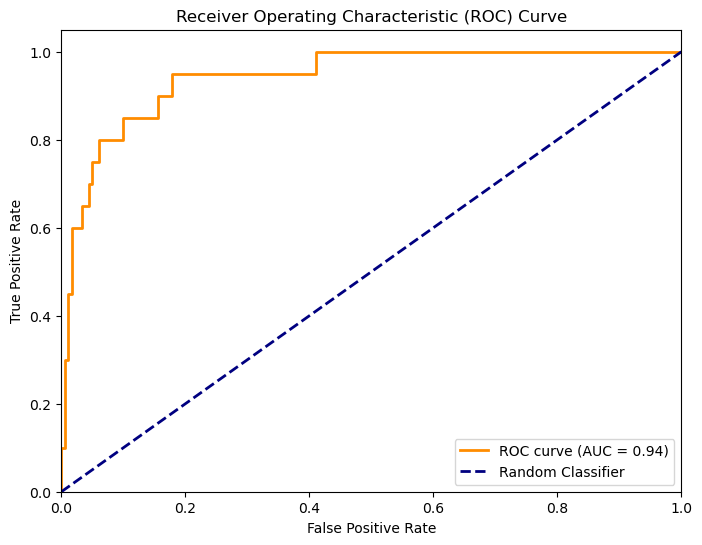

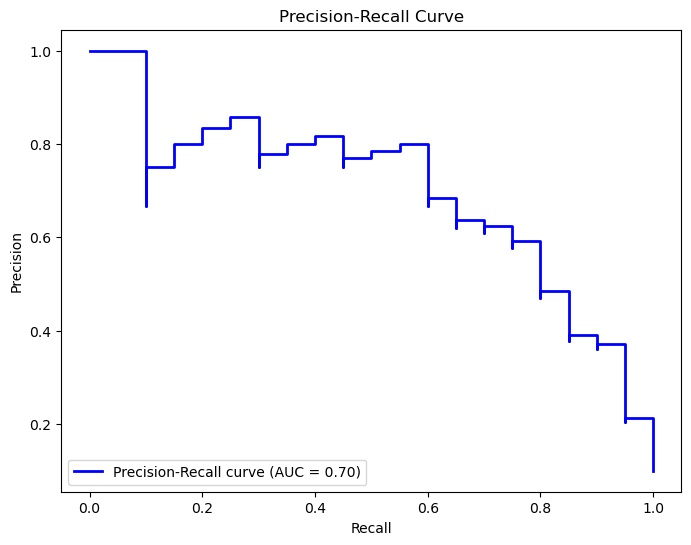

In [585]:
X_train, X_test = X[train_idx_svc], X[test_idx_svc]
Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]

# ROC curve
decision_function = classifier2.decision_function(X_test)
fpr, tpr, _ = roc_curve(Y_test, decision_function)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, decision_function)
pr_auc = average_precision_score(Y_test, decision_function)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


---
**Task 11 (medium): ROC and Precision-Recall curves evaluation💡📽️**
1. Use the confusion matrix metrics to argue how the plots provide different insights into the classification model's ability to handle class imbalance? 
2. Describe when and why you would prioritize one curve over the other when dealing with imbalanced data.


---

In [ ]:
#Write your reflections here...

# -----1------
# ROC: It plots TP Rates vs. FP Rates at different thresholds. It represents the trade-off between the sensitivity 
# and specificity of a classifier.
# In our case there are very few false positives, 0 or 1 and also few false negative, 0 to 3. 
# As long as there are more true positives than false positives then the ROC curve looks good.
# Same amount of TP and FP then we have the random line, but now we often have more TP than FP because it almost never find any 
# FP. The classifier therefore on the ROC curves looks to peform well. We always have more true positives than false posatives.

# AUC and ROC is effective when the dataset is balanced. Our dataset is not very balanced.
# We can see on the confusion matrix that we have a lot of false negative, where ROC does not show that at all.

# Precision-Recall we want both to be high, and therefore the closer to top right corner the better. In my it is not super high.
# It illustrates the tradeof between precision and recall. Stands for Area-under-curve. The area under my curve is not that big 
# which gives me an indication that there is not a good balance between precision and recall. 
# AUC around 0.5: The model doesn’t learn any meaningful patterns i.e it is doing random guessing. I.e. ours is doing random guessing
# the AUC is 0.57 in PR curve.
# The AUC on ROC curve is 0.94

# ------2-------
# Position-recall is often worse than ROC. PR is better at detecting imbalance, than ROC, so imbalanced dataset then i 
# would use PR. 
# Our class is very imbalanced and ROC looks pretty good. Where PR is more realistic. 
# It is an indicator of class imbalance. 
# ROC curves are suitable when the class distribution is balanced and false positives and false negatives have similar consequences. 
# Precision means how many actual positives are correctly predicted. 
# We decide what metrics we want to use depending on what we use it for. If we use it to detect cancer it is important to
# get all positives, even if it means we get more false positives in the data set.
# With spam mails it is okay that we don't always get all the true positives.

